# Data Import, Cleaning and Structuring

This dataset used in this analysis was sourced from United States government's open data website, [**Data.gov**](https://data.gov/). 

Here is the link to this specific data set, [**Motor Vehicle Collisions**](https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mv_col = pd.read_csv("/kaggle/input/motor-vehicle-collisions/Motor_Vehicle_Collisions.csv", low_memory=False)

In [3]:
mv_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034019 entries, 0 to 2034018
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

Date and time are in different columns but we can do alot if they are both in the same column rather than when apart. So let us put them together then convert to datetime format

In [4]:
mv_col["CRASH DATE"] = mv_col["CRASH DATE"] + " " + mv_col["CRASH TIME"]

In [5]:
mv_col["CRASH DATE"] = pd.to_datetime(mv_col["CRASH DATE"])

In [6]:
mv_col.shape

(2034019, 29)

From the date column, let us create four more columns, 
* Crash year, will have only the year of crash.
* Crash month will have the month relating to the crash in numeric format.
* Crash month name will be the name of the month.
* Crash hour will be the hour of the day, in 24hr format, when the crash occurred.

In [7]:
mv_col["CRASH YEAR"] = mv_col["CRASH DATE"].dt.year
mv_col["CRASH MONTH"] = mv_col["CRASH DATE"].dt.month
mv_col["CRASH MONTH NAME"] = mv_col["CRASH DATE"].dt.strftime('%b')
mv_col["CRASH HOUR"] = mv_col["CRASH DATE"].dt.hour
mv_col["CRASH WEEK"] = mv_col["CRASH DATE"].dt.strftime('%a')

Later on during the analysis, you will notice that some of the vehicle types have thier names in different cases(upper and lower) in both Vehicle Type Code 1 and Vehicle Type 2 columns. To avoid getting back data preparation once the analysis has started, let's us do it right now.
* **SPORT UTILITY / STATION WAGON** and **Station Wagon/Sport Utility Vehicle** are treated and different categories, we will rename the former to match the later.
* The same is observed in the instances of **PICK-UP TRUCK** vs **Pick-up Truck** and **TAXI** vs **Taxi**

In [8]:
mv_col["VEHICLE TYPE CODE 1"] = mv_col["VEHICLE TYPE CODE 1"].replace(["SPORT UTILITY / STATION WAGON"], "Station Wagon/Sport Utility Vehicle")
mv_col["VEHICLE TYPE CODE 2"] = mv_col["VEHICLE TYPE CODE 2"].replace(["SPORT UTILITY / STATION WAGON"], "Station Wagon/Sport Utility Vehicle")

In [9]:
mv_col['VEHICLE TYPE CODE 1'] = mv_col['VEHICLE TYPE CODE 1'].replace(["PICK-UP TRUCK"], "Pick-up Truck")
mv_col['VEHICLE TYPE CODE 2'] = mv_col['VEHICLE TYPE CODE 2'].replace(["PICK-UP TRUCK"], "Pick-up Truck")

In [10]:
mv_col['VEHICLE TYPE CODE 1'] = mv_col['VEHICLE TYPE CODE 1'].replace(["TAXI"], "Taxi")
mv_col['VEHICLE TYPE CODE 2'] = mv_col['VEHICLE TYPE CODE 2'].replace(["TAXI"], "Taxi")

We will also put **4 dr sedan** in the **Sedan** category by renaming the former

In [11]:
mv_col['VEHICLE TYPE CODE 1'] = mv_col['VEHICLE TYPE CODE 1'].replace(["4 dr sedan"], "Sedan")
mv_col['VEHICLE TYPE CODE 2'] = mv_col['VEHICLE TYPE CODE 2'].replace(["4 dr sedan"], "Sedan")

We might have to check the road accidents during different seasons, so let us create a Crash Season column

In [12]:
def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

mv_col["CRASH SEASON"] = mv_col['CRASH MONTH'].apply(get_season)

In [13]:
mv_col.shape

(2034019, 35)

In [14]:
mv_col.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           632787
ZIP CODE                          633028
LATITUDE                          230884
LONGITUDE                         230884
LOCATION                          230884
ON STREET NAME                    429166
CROSS STREET NAME                 763510
OFF STREET NAME                  1697226
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6442
CONTRIBUTING FACTOR VEHICLE 2     311455
CONTRIBUTING FACTOR VEHICLE 3    1889497
CONTRIBUTING FACTOR VEHICLE 4    2001552
CONTRIBUTING FACTOR VEHICLE 5    2025235
COLLISION_ID                           0
VEHICLE TYPE COD

There are a number of columns which will not be of help to our analysis, We will get rid of them. Currently, there are a totals of 35 columns, 16 will be of no use that means we will only need 19 of them. 
For the columns that we will use, there are only a few of them which are missing their values hence the missing values are insignificant and will not affect our analysis

In [15]:
retain = ["CRASH DATE", "CRASH YEAR", "CRASH MONTH", "CRASH MONTH NAME", 
          "CRASH HOUR", "CRASH WEEK", "CRASH SEASON","NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED",
        "NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED", 
        "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", 
        "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED", 
        "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2", 
        "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2"]

In [16]:
mv_collisions = mv_col[retain]

In [17]:
mv_collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034019 entries, 0 to 2034018
Data columns (total 19 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH YEAR                     int32         
 2   CRASH MONTH                    int32         
 3   CRASH MONTH NAME               object        
 4   CRASH HOUR                     int32         
 5   CRASH WEEK                     object        
 6   CRASH SEASON                   object        
 7   NUMBER OF PERSONS INJURED      float64       
 8   NUMBER OF PERSONS KILLED       float64       
 9   NUMBER OF PEDESTRIANS INJURED  int64         
 10  NUMBER OF PEDESTRIANS KILLED   int64         
 11  NUMBER OF CYCLIST INJURED      int64         
 12  NUMBER OF CYCLIST KILLED       int64         
 13  NUMBER OF MOTORIST INJURED     int64         
 14  NUMBER OF MOTORIST KILLED      int64         
 15  CONTRIBUTING FA

In [18]:
mv_collisions.shape

(2034019, 19)

This dataset may have some duplicated rows, and for accurate analysis, we will have to get rid of them.

In [19]:
mv_collisions = mv_collisions.drop_duplicates()

# Analysis
# Road Collisions
## Yearly Collisons 

In [20]:
mv_collisions["CRASH YEAR"].value_counts()

CRASH YEAR
2018    228199
2017    227170
2016    226368
2015    213371
2019    209014
2014    200972
2013    197762
2020    111997
2021    109846
2022    103322
2012     97345
2023     74465
Name: count, dtype: int64

As at the time of this exploratory data analysis, the year 2023 is not yet over hence we will exempt the same from our analysis

In [21]:
col_12to22 = mv_collisions[mv_collisions["CRASH YEAR"] != 2023]

In [22]:
col_12to22["CRASH YEAR"].value_counts()

CRASH YEAR
2018    228199
2017    227170
2016    226368
2015    213371
2019    209014
2014    200972
2013    197762
2020    111997
2021    109846
2022    103322
2012     97345
Name: count, dtype: int64

In [23]:
yearly_col = col_12to22["CRASH YEAR"].value_counts().reset_index()
yearly_col.columns = ["CRASH YEAR", "COUNTS"]
yearly_col

,CRASH YEAR,COUNTS
0,2018,228199
1,2017,227170
2,2016,226368
3,2015,213371
4,2019,209014
5,2014,200972
6,2013,197762
7,2020,111997
8,2021,109846
9,2022,103322


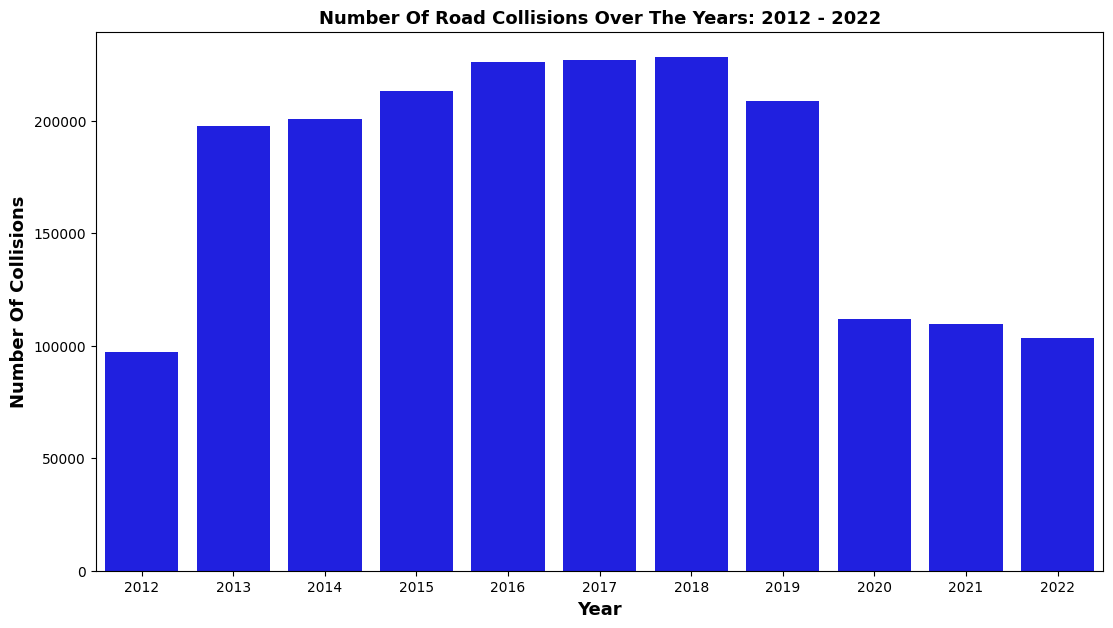

In [24]:
palette_x= ["blue"] 
palette_y= ["orange"]

plt.figure(figsize=(13,7))
sns.barplot(data=yearly_col, x="CRASH YEAR", y="COUNTS", palette =palette_x)
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Number Of Road Collisions Over The Years: 2012 - 2022", fontweight="bold", fontsize=13)


plt.show()

The visualization above is a bar graph containing the number of collisions that happened between the year 2012 till 2022. The number of collisons rose in the period, 2012 till 2016 then stagnated a bit in the next two years.

## Hourly Collisions

In [25]:
hourly_crash = col_12to22.groupby("CRASH HOUR").size().reset_index(name="Number Of Collisions")
hourly_crash

,CRASH HOUR,Number Of Collisions
0,0,60783
1,1,32890
2,2,25228
3,3,22044
4,4,24944
5,5,27313
6,6,42638
7,7,58053
8,8,105651
9,9,102594


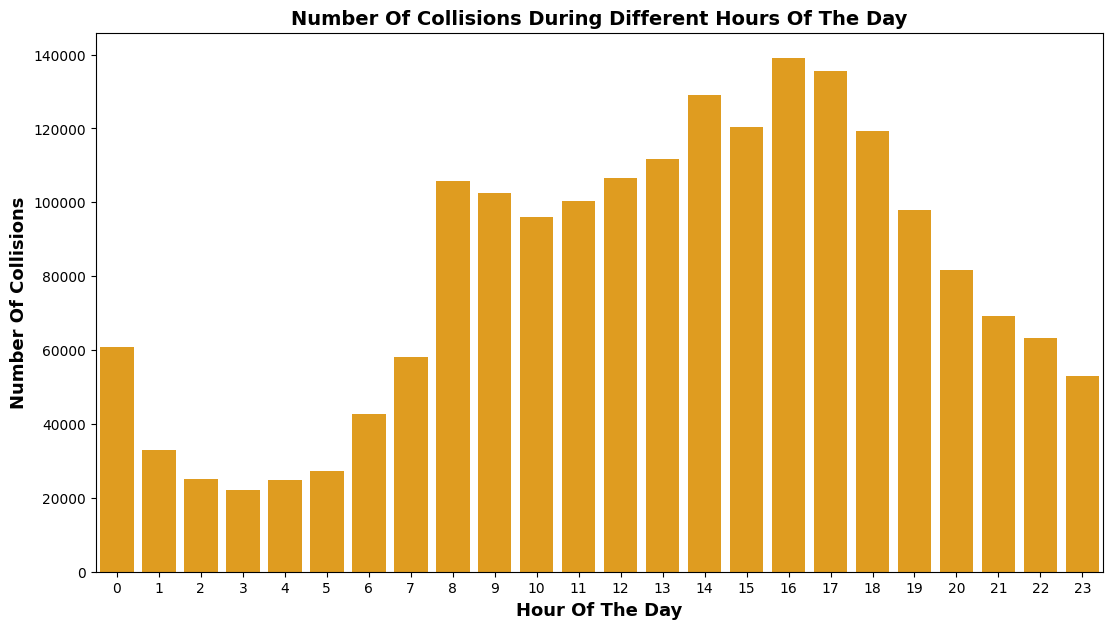

In [26]:
plt.figure(figsize=(13,7))
sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Hour Of The Day", fontweight="bold", fontsize=13)
plt.title("Number Of Collisions During Different Hours Of The Day", 
          fontweight="bold", fontsize=14)

plt.show()

During the hours of the late night till early morning, 0100 to around 0500 hours, there are few number of collisions, this could be due to lower number of vehicles on the road. From 0600 hours and as the day gets by, the road becomes busier therefore higher chances of collisons.
From 1700 hours the number of road collisions drops gradually till midnight.

## Weekly Collisions


In [27]:
yrly_weekly = col_12to22.groupby(["CRASH YEAR", "CRASH WEEK"]).size().reset_index(name="Number Of Collisions")

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
yrly_weekly['CRASH WEEK'] = pd.Categorical(yrly_weekly['CRASH WEEK'], categories=weekday_order, ordered=True)

yrly_weekly.head()

,CRASH YEAR,CRASH WEEK,Number Of Collisions
0,2012,Fri,15751
1,2012,Mon,13834
2,2012,Sat,12921
3,2012,Sun,12073
4,2012,Thu,14277


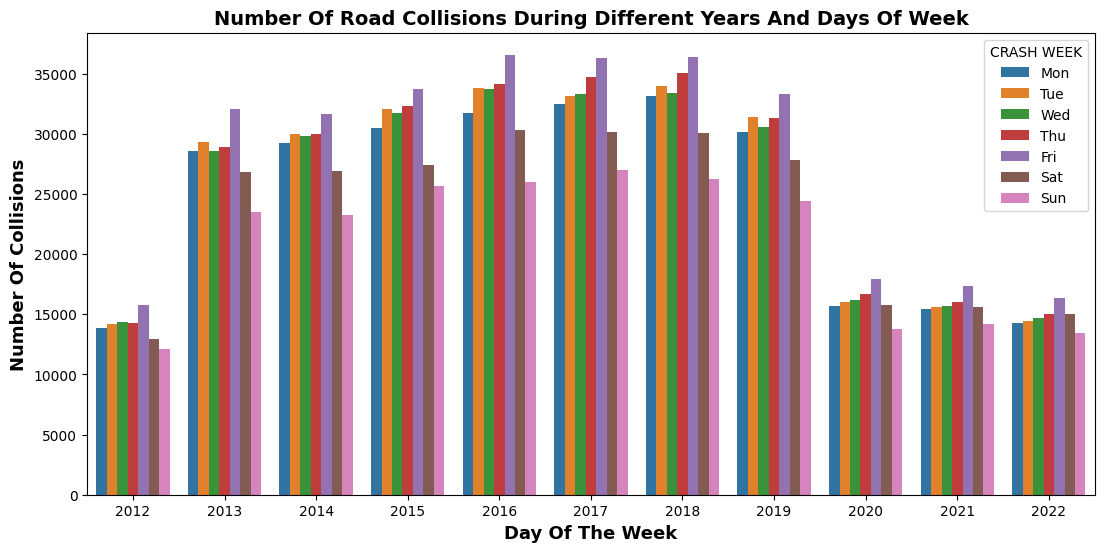

In [28]:
plt.figure(figsize=(13,6))
sns.barplot(data=yrly_weekly, x="CRASH YEAR", y="Number Of Collisions", hue="CRASH WEEK")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Day Of The Week", fontweight="bold", fontsize=13)
plt.title("Number Of Road Collisions During Different Years And Days Of Week", 
          fontweight="bold", fontsize=14)

plt.show()

In all of the years, there seems to be some uniformity. The number of collisions slowly rises from Monday till Thusday before shooting up on Friday. 
A gradual drop is then observed in the two days of the weekend.

## Collisions During Different Seasons

In [29]:
seasons_crash = col_12to22.groupby(["CRASH SEASON"]).size().reset_index(name="Number Of Collisions")
seasons_crash

,CRASH SEASON,Number Of Collisions
0,Autumn,515522
1,Spring,452137
2,Summer,507375
3,Winter,450332


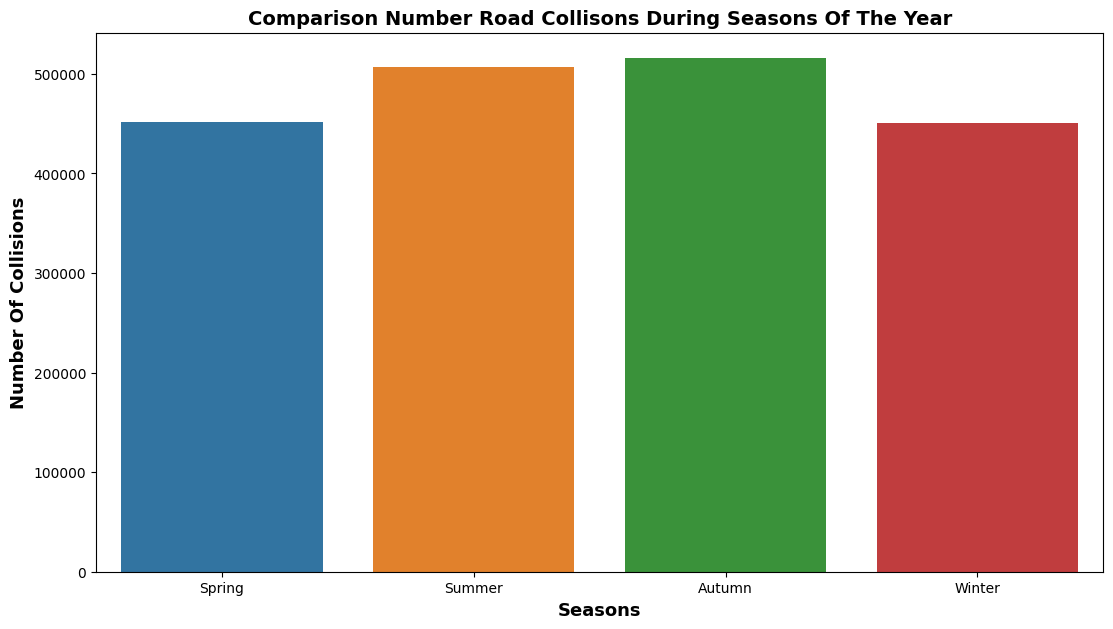

In [30]:
seasons_order = ["Spring", "Summer", "Autumn", "Winter"]
seasons_crash["CRASH SEASON"] = pd.Categorical(seasons_crash["CRASH SEASON"], categories=seasons_order, ordered=True)

plt.figure(figsize=(13,7))
sns.barplot(data=seasons_crash, x="CRASH SEASON", y="Number Of Collisions")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Seasons", fontweight="bold", fontsize=13)
plt.title("Comparison Number Road Collisons During Seasons Of The Year", 
          fontweight="bold", fontsize=14)
plt.show()

Overally, there higher number of collisions in Autumn and Summer. 
* For Summer, this could be due to higher number vehicles in the road as a result warmer temperatures which favours outdoor activities, holidays, etc. 
* In Autumn, during the transition from summer, there are unpredictable weather, including rain and fog which causes more accidents.

In [31]:
yrly_seasons = col_12to22.groupby(["CRASH YEAR", "CRASH SEASON"]).size().reset_index(name="Number Of Collisions")

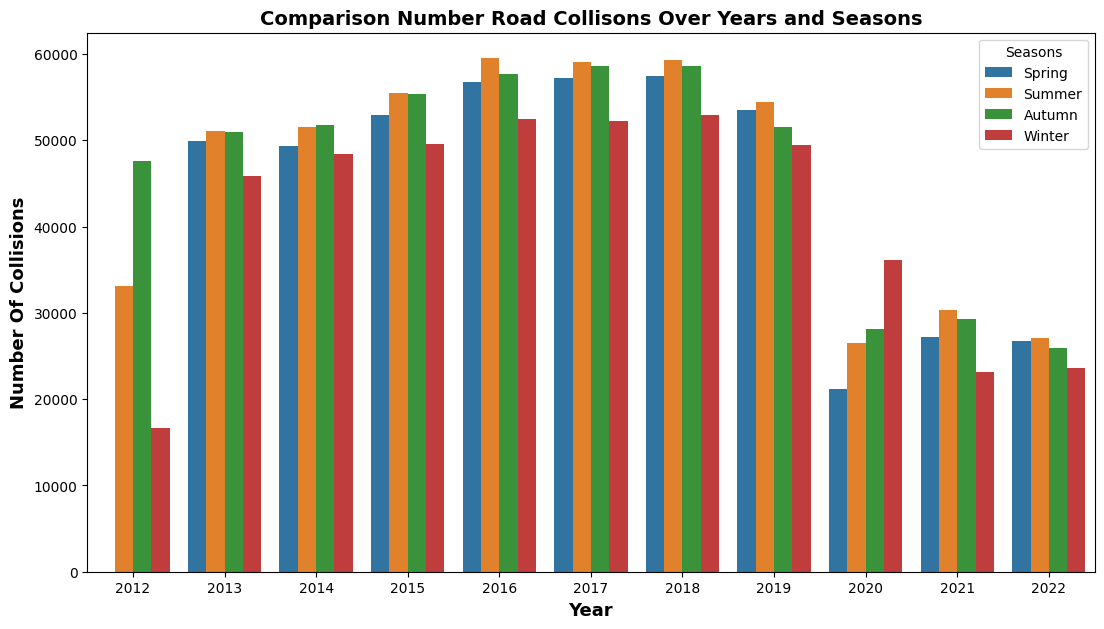

In [32]:
yrly_seasons["CRASH SEASON"] = pd.Categorical(yrly_seasons["CRASH SEASON"], categories=seasons_order, ordered=True)

plt.figure(figsize=(13,7))
sns.barplot(yrly_seasons, x="CRASH YEAR", y="Number Of Collisions", hue="CRASH SEASON")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Comparison Number Road Collisons Over Years and Seasons", 
          fontweight="bold", fontsize=14)
plt.legend(title="Seasons", loc="upper right")
plt.show()

In almost all years, the number of road collisions are usually lower in Winter. This is due to reduced vehicles on the road because of the unfavourable weather conditions. The case of 2020-21 Winter was however different. The number of collisions was more as the region faced a significant winter season 

## Vehicle Types Vs Collisions

In [33]:
col_12to22["VEHICLE TYPE CODE 1"].value_counts().head(20)

VEHICLE TYPE CODE 1
Station Wagon/Sport Utility Vehicle    585740
Sedan                                  554494
PASSENGER VEHICLE                      400060
Taxi                                    80205
Pick-up Truck                           43450
VAN                                     25178
OTHER                                   22896
Box Truck                               22456
UNKNOWN                                 19848
Bus                                     19288
LARGE COM VEH(6 OR MORE TIRES)          14380
BUS                                     13962
SMALL COM VEH(4 TIRES)                  13192
Bike                                    12877
LIVERY VEHICLE                          10467
Tractor Truck Diesel                     9569
Van                                      8290
Motorcycle                               7037
MOTORCYCLE                               4187
Ambulance                                3709
Name: count, dtype: int64

In [34]:
col_12to22["VEHICLE TYPE CODE 2"].value_counts().head(20)

VEHICLE TYPE CODE 2
Station Wagon/Sport Utility Vehicle    437803
Sedan                                  397532
PASSENGER VEHICLE                      305222
UNKNOWN                                 78853
Taxi                                    63539
Pick-up Truck                           39849
Bike                                    27376
Box Truck                               25583
VAN                                     22696
OTHER                                   21607
BICYCLE                                 18513
Bus                                     17173
LARGE COM VEH(6 OR MORE TIRES)          13663
SMALL COM VEH(4 TIRES)                  12936
BUS                                     11475
Tractor Truck Diesel                     9322
LIVERY VEHICLE                           8447
Van                                      7806
Motorcycle                               5694
E-Bike                                   4025
Name: count, dtype: int64

In the preview above, we can see that Sedan, Station Wagon, passenger vehicle, Taxi and Pick-up Truck are the top 5 vehicles which have been involved in road collisons. Let's create a variable that contains the number of collisions that has been recorded in each of top 5 vehicle types.   

In [35]:
vehicle_type = ["Sedan", "Station Wagon/Sport Utility Vehicle", "PASSENGER VEHICLE", "Pick-up Truck", "Taxi"]

type_1 = col_12to22[col_12to22["VEHICLE TYPE CODE 1"].isin(vehicle_type)]

In [36]:
yrly_type_1 = type_1.groupby(["CRASH YEAR", "VEHICLE TYPE CODE 1"]).size().reset_index(name="Counts")
yrly_type_1.head(20)

,CRASH YEAR,VEHICLE TYPE CODE 1,Counts
0,2012,PASSENGER VEHICLE,54983
1,2012,Pick-up Truck,1490
2,2012,Sedan,11
3,2012,Station Wagon/Sport Utility Vehicle,20407
4,2012,Taxi,4055
5,2013,PASSENGER VEHICLE,108726
6,2013,Pick-up Truck,3007
7,2013,Sedan,30
8,2013,Station Wagon/Sport Utility Vehicle,44841
9,2013,Taxi,8744


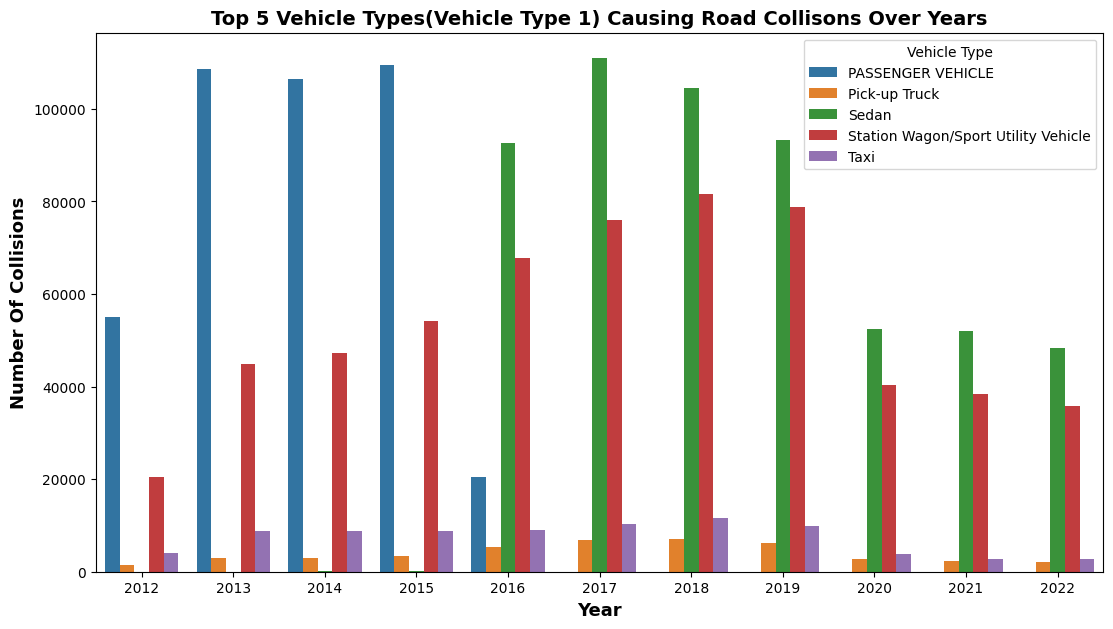

In [37]:
plt.figure(figsize=(13,7))
sns.barplot(data=yrly_type_1, x="CRASH YEAR", y="Counts", hue="VEHICLE TYPE CODE 1")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Top 5 Vehicle Types(Vehicle Type 1) Causing Road Collisons Over Years", 
          fontweight="bold", fontsize=14)
plt.legend(title="Vehicle Type", loc="upper right")

plt.show()

In [38]:
type_2 = col_12to22[col_12to22["VEHICLE TYPE CODE 2"].isin(vehicle_type)]
yrly_type_2 = type_2.groupby(["CRASH YEAR", "VEHICLE TYPE CODE 2"]).size().reset_index(name="Counts")
yrly_type_2.head(20)

,CRASH YEAR,VEHICLE TYPE CODE 2,Counts
0,2012,PASSENGER VEHICLE,41634
1,2012,Pick-up Truck,1369
2,2012,Sedan,8
3,2012,Station Wagon/Sport Utility Vehicle,15583
4,2012,Taxi,3584
5,2013,PASSENGER VEHICLE,83153
6,2013,Pick-up Truck,2829
7,2013,Sedan,12
8,2013,Station Wagon/Sport Utility Vehicle,34907
9,2013,Taxi,7594


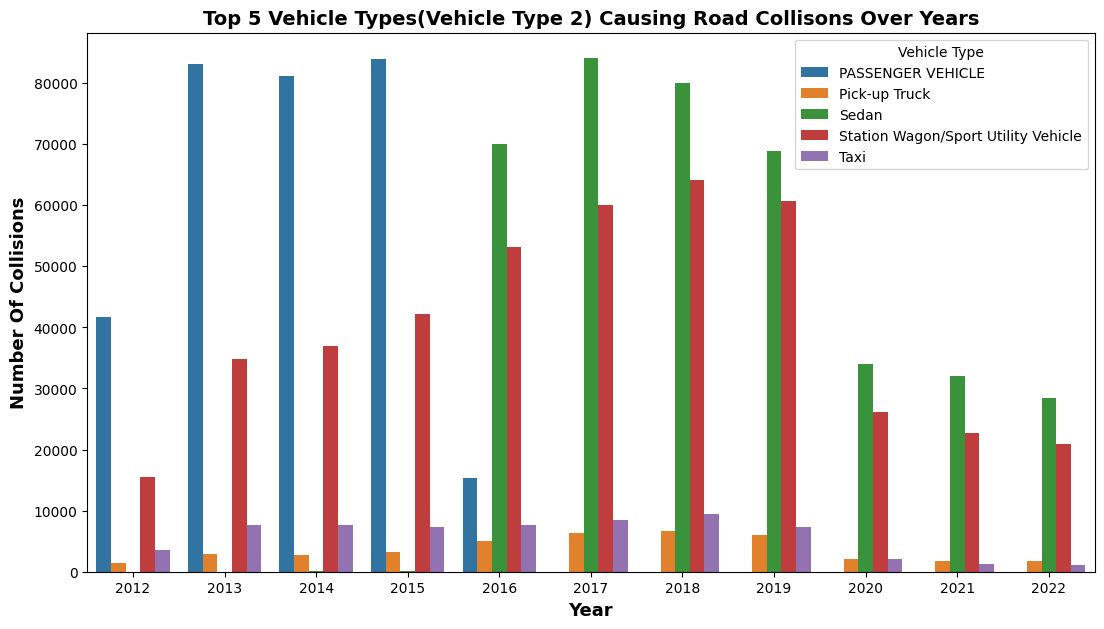

In [39]:
plt.figure(figsize=(13,7))
sns.barplot(data=yrly_type_2, x="CRASH YEAR", y="Counts", hue="VEHICLE TYPE CODE 2")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Top 5 Vehicle Types(Vehicle Type 2) Causing Road Collisons Over Years", 
          fontweight="bold", fontsize=14)
plt.legend(title="Vehicle Type", loc="upper right")

plt.show()

In the two visualizations above, we can outline that for both Vehicle Type Code 1 and 2, the consistent vehicle types which have been involved in accidents are Passenger Vehicles, Sport Utility Vehicles and Sedans. Pick Up Trucks and Taxis have however been the least involved in collisions for the top 5 vehicle types.

# Collison Contributing Factors

In [40]:
col_12to22["CONTRIBUTING FACTOR VEHICLE 1"].value_counts().head(20)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       654357
Driver Inattention/Distraction    381581
Failure to Yield Right-of-Way     114557
Following Too Closely             102442
Backing Unsafely                   72806
Other Vehicular                    60789
Passing or Lane Usage Improper     52561
Turning Improperly                 48364
Passing Too Closely                47623
Fatigued/Drowsy                    46947
Unsafe Lane Changing               38348
Traffic Control Disregarded        33371
Driver Inexperience                29905
Unsafe Speed                       24482
Alcohol Involvement                20491
Lost Consciousness                 20209
Reaction to Uninvolved Vehicle     18777
Pavement Slippery                  18663
Prescription Medication            15363
View Obstructed/Limited            12698
Name: count, dtype: int64

Ther are many factors which could contribute to accidents and the top 3 for vehicle type code 1 are:
* Driver innatention
* Failure to yield right of way
* Following too closely  

We will filter our data to reflect the above then compare how those top 3 factors have been causing collissions over years

In [41]:
top3_causes_vh1 = ["Driver Inattention/Distraction", "Failure to Yield Right-of-Way", "Following Too Closely"]

top3_vh1 = col_12to22[col_12to22["CONTRIBUTING FACTOR VEHICLE 1"].isin(top3_causes_vh1)]

In [42]:
yrly_top3_vh1 = top3_vh1.groupby(["CRASH YEAR", "CONTRIBUTING FACTOR VEHICLE 1"]).size().reset_index(name ="COLLISIONS COUNT")

yrly_top3_vh1.head(6)

,CRASH YEAR,CONTRIBUTING FACTOR VEHICLE 1,COLLISIONS COUNT
0,2012,Driver Inattention/Distraction,10336
1,2012,Failure to Yield Right-of-Way,3914
2,2012,Following Too Closely,73
3,2013,Driver Inattention/Distraction,22196
4,2013,Failure to Yield Right-of-Way,7996
5,2013,Following Too Closely,146


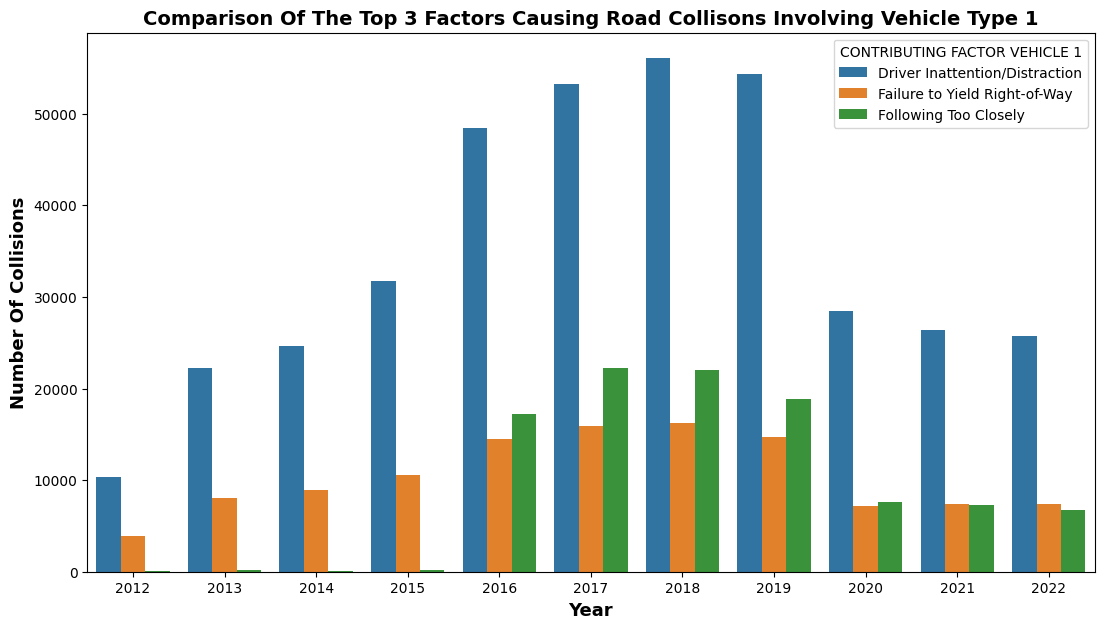

In [43]:
plt.figure(figsize=(13,7))
sns.barplot(data=yrly_top3_vh1, x="CRASH YEAR", y="COLLISIONS COUNT", hue="CONTRIBUTING FACTOR VEHICLE 1")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Comparison Of The Top 3 Factors Causing Road Collisons Involving Vehicle Type 1", 
          fontweight="bold", fontsize=14)

plt.show()

In [44]:
col_12to22["CONTRIBUTING FACTOR VEHICLE 2"].value_counts().head(20)

CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1373848
Driver Inattention/Distraction      88637
Other Vehicular                     30590
Following Too Closely               17605
Failure to Yield Right-of-Way       16363
Passing or Lane Usage Improper      11933
Fatigued/Drowsy                     10812
Turning Improperly                   8466
Passing Too Closely                  8198
Backing Unsafely                     7686
Traffic Control Disregarded          6780
Unsafe Lane Changing                 6386
Driver Inexperience                  6337
Lost Consciousness                   5222
Unsafe Speed                         4605
Pavement Slippery                    3932
Reaction to Uninvolved Vehicle       3139
Prescription Medication              3019
View Obstructed/Limited              2935
Outside Car Distraction              2520
Name: count, dtype: int64

For vehicle type code 2, driver innatention, following too closely and other vehicular are the top 3 contributing factors. We will also filter our data to reflect the above

In [45]:
top3_causes_vh2 = ["Driver Inattention/Distraction", "Other Vehicular", "Following Too Closely"]

top3_vh2 = col_12to22[col_12to22["CONTRIBUTING FACTOR VEHICLE 2"].isin(top3_causes_vh2)]

In [46]:
yrly_top3_vh2 = top3_vh2.groupby(["CRASH YEAR", "CONTRIBUTING FACTOR VEHICLE 2"]).size().reset_index(name ="COLLISIONS COUNT")
yrly_top3_vh2.head(6)

,CRASH YEAR,CONTRIBUTING FACTOR VEHICLE 2,COLLISIONS COUNT
0,2012,Driver Inattention/Distraction,2494
1,2012,Following Too Closely,3
2,2012,Other Vehicular,1331
3,2013,Driver Inattention/Distraction,5455
4,2013,Following Too Closely,6
5,2013,Other Vehicular,2725


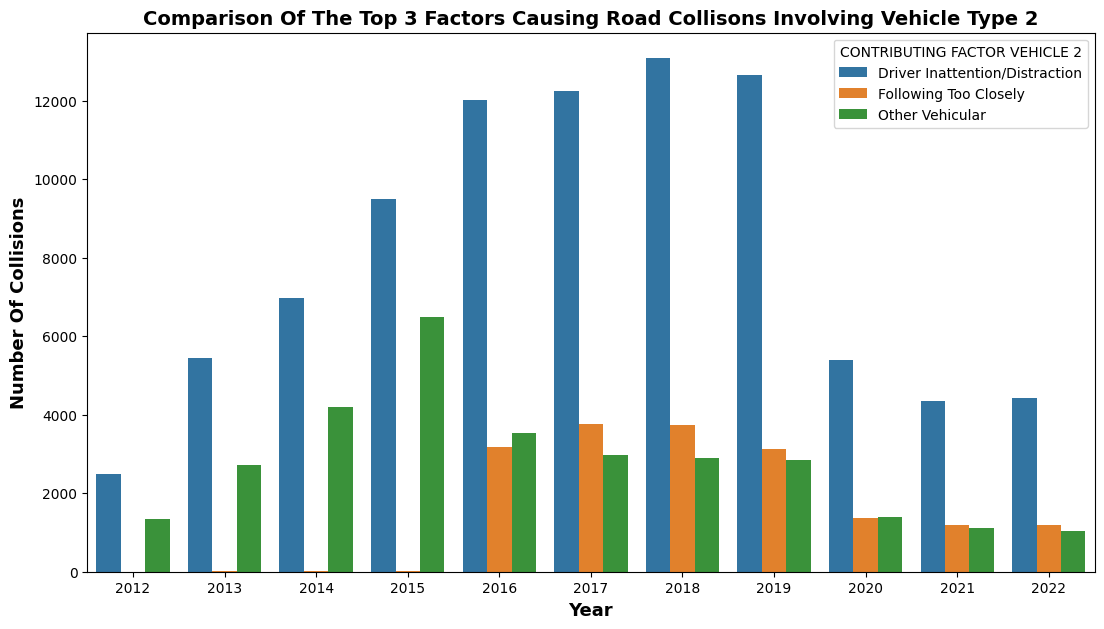

In [47]:
plt.figure(figsize=(13,7))
sns.barplot(data=yrly_top3_vh2, x="CRASH YEAR", y="COLLISIONS COUNT", hue="CONTRIBUTING FACTOR VEHICLE 2")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Year", fontweight="bold", fontsize=13)
plt.title("Comparison Of The Top 3 Factors Causing Road Collisons Involving Vehicle Type 2", 
          fontweight="bold", fontsize=14)

plt.show()

In the two visualizations above, we note that for both vehicle code 1 and 2, Driver Innatention stands out the most as it is way higher compared to the other factors. With this we can take a deeper look of how this factor has been causing collisions in each day of the week.

In [48]:
distraction = col_12to22[(col_12to22["CONTRIBUTING FACTOR VEHICLE 1"] =="Driver Inattention/Distraction") | (col_12to22["CONTRIBUTING FACTOR VEHICLE 2"] =="Driver Inattention/Distraction")]

In [49]:
weekly_distraction = distraction.groupby(["CRASH WEEK"]).size().reset_index(name="Number Of Collisions")

weekly_distraction

,CRASH WEEK,Number Of Collisions
0,Fri,64454
1,Mon,57360
2,Sat,54222
3,Sun,47900
4,Thu,60601
5,Tue,59515
6,Wed,59418


In [50]:
weekly_distraction["CRASH WEEK"] = pd.Categorical(weekly_distraction["CRASH WEEK"], categories=weekday_order, ordered=True)

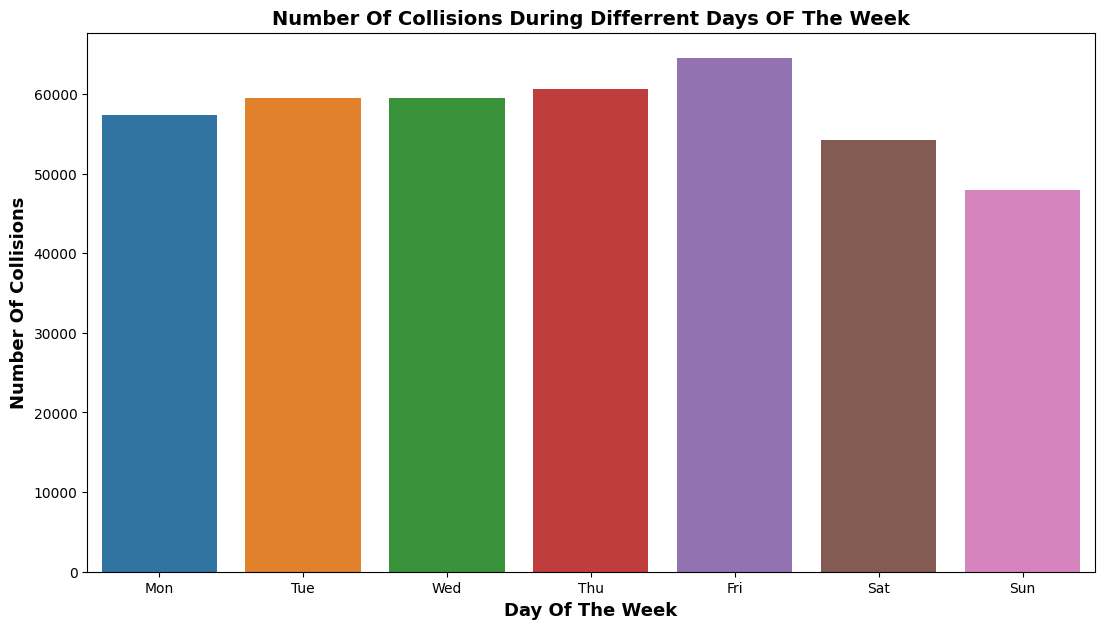

In [51]:
plt.figure(figsize=(13,7))
sns.barplot(data=weekly_distraction, x="CRASH WEEK", y="Number Of Collisions")
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Day Of The Week", fontweight="bold", fontsize=13)
plt.title("Number Of Collisions During Differrent Days OF The Week", 
          fontweight="bold", fontsize=14)

plt.show()

We can conclude that as the week goes by, the level of distraction or driver innatention rises hence more and more collisions.

A drop is noted in the two days of the weekend which could be as a result of reduced number of vehicles on the road

# Road Collisions Casualties

## Persons Injured and Persons Killed Over Years

In [52]:
yearly_casualties = col_12to22.groupby("CRASH YEAR")[["NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().reset_index()
yearly_casualties

,CRASH YEAR,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,2012,27326.0,137.0
1,2013,54913.0,297.0
2,2014,51042.0,261.0
3,2015,51122.0,240.0
4,2016,60108.0,246.0
5,2017,60355.0,254.0
6,2018,61682.0,231.0
7,2019,61257.0,243.0
8,2020,44546.0,269.0
9,2021,51718.0,296.0


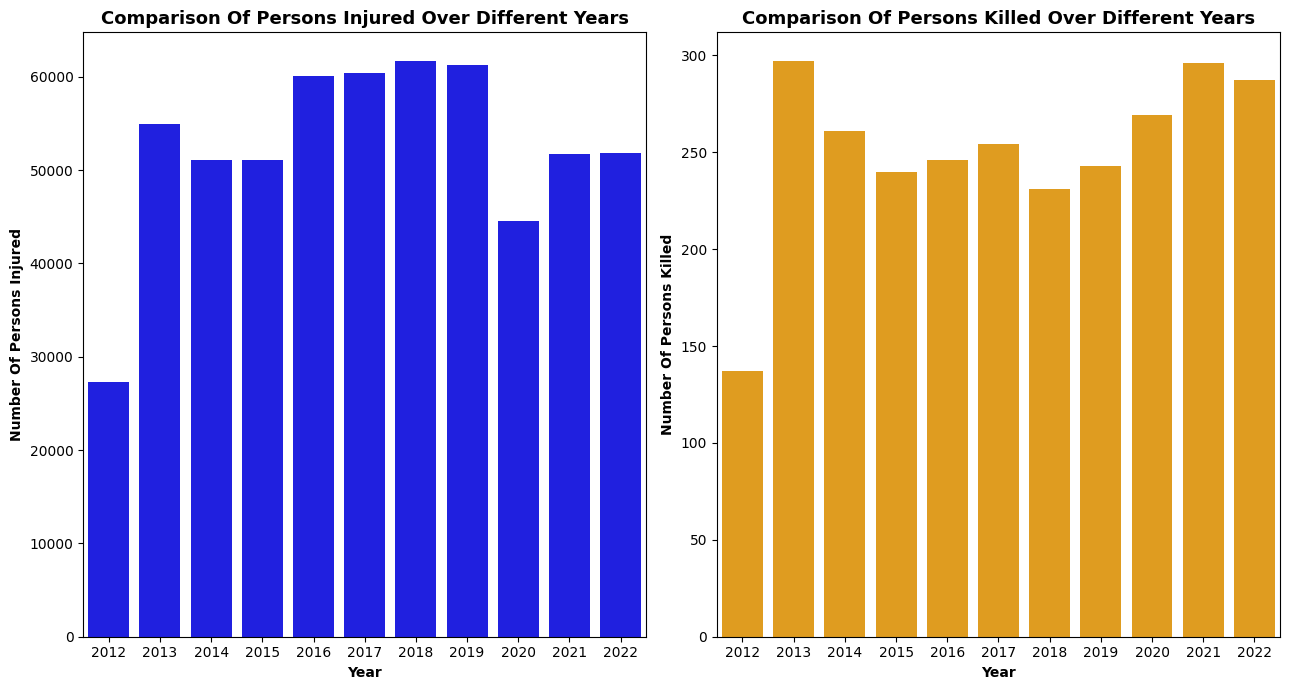

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7))
sns.barplot(data=yearly_casualties, x="CRASH YEAR", y="NUMBER OF PERSONS INJURED", ax=axes[0], palette=palette_x)
axes[0].set_title("Comparison Of Persons Injured Over Different Years", fontweight="bold", fontsize=13)
axes[0].set_xlabel("Year", fontweight="bold")
axes[0].set_ylabel("Number Of Persons Injured", fontweight="bold")

sns.barplot(data=yearly_casualties, x="CRASH YEAR", y="NUMBER OF PERSONS KILLED", ax=axes[1], palette=palette_y)
axes[1].set_title("Comparison Of Persons Killed Over Different Years", fontweight="bold", fontsize=13)
axes[1].set_xlabel("Year", fontweight="bold")
axes[1].set_ylabel("Number Of Persons Killed", fontweight="bold")
plt.tight_layout()

plt.show()

In the visualization above, we can conclude that in New York, approximately 50,000 people have been injured annually due to road collisions from 2013 to 2022. 

During the same period, an average of over 230 people per year have lost their lives.

## Casualities During Different Hours Of The Day

In [54]:
hourly_casualties = col_12to22.groupby(["CRASH HOUR"])[["NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED"]].sum().reset_index()
hourly_casualties

,CRASH HOUR,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0,2808,55,1513,13,16610,73
1,1,1271,34,620,5,9825,72
2,2,984,36,427,2,7925,59
3,3,876,44,328,5,7185,70
4,4,1039,55,304,2,8434,92
5,5,1160,56,377,6,7913,48
6,6,2458,65,663,10,10049,37
7,7,3430,36,1140,12,13094,22
8,8,5791,48,1824,13,20028,17
9,9,4586,49,1851,10,17320,24


### Pedestrians Injured and Pedestrians Killed

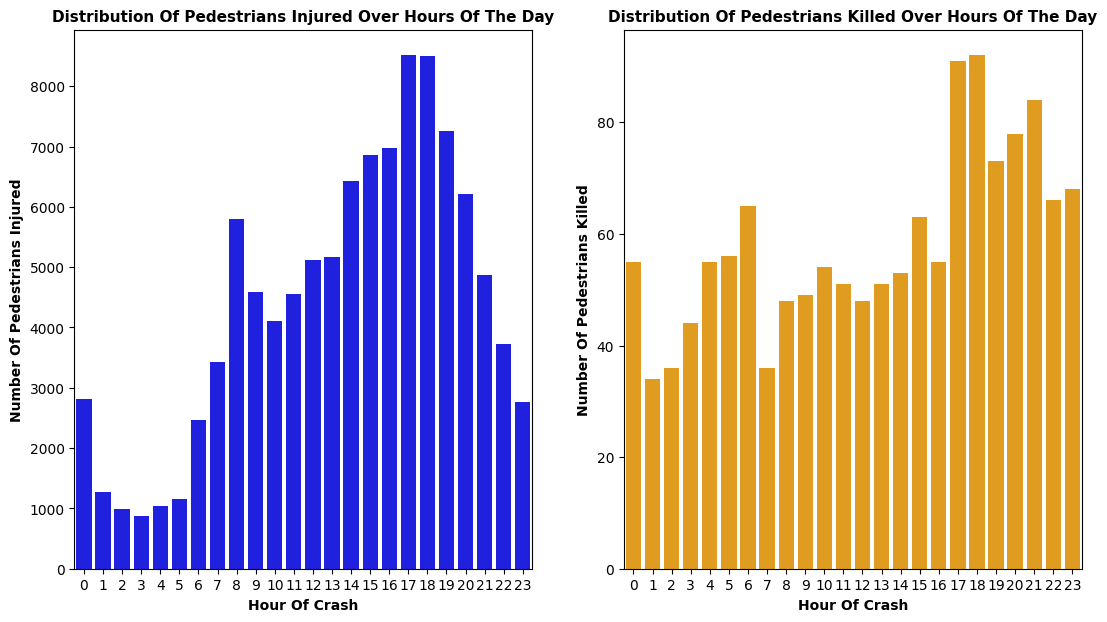

In [55]:
figure, axes = plt.subplots(1,2, figsize=(13,7))
sns.barplot(data=hourly_casualties, x="CRASH HOUR", y="NUMBER OF PEDESTRIANS INJURED", ax=axes[0], palette=palette_x)
axes[0].set_xlabel("Hour Of Crash", fontweight="bold")
axes[0].set_ylabel("Number Of Pedestrians Injured", fontweight="bold")
axes[0].set_title("Distribution Of Pedestrians Injured Over Hours Of The Day", fontweight="bold", fontsize=11)


sns.barplot(data=hourly_casualties, x="CRASH HOUR", y="NUMBER OF PEDESTRIANS KILLED", ax=axes[1], palette=palette_y)
axes[1].set_xlabel("Hour Of Crash", fontweight="bold")
axes[1].set_ylabel("Number Of Pedestrians Killed", fontweight="bold")
axes[1].set_title("Distribution Of Pedestrians Killed Over Hours Of The Day", fontweight="bold", fontsize=11)

plt.show()

During different hours of the day, the number of people walking on the road differs. During late night to early morning hours, 1 AM to 5AM, the number of pedestrians are a lower hence lower number of casualities involving them.

From 0600 hours the number of casualties tend to rise, this can be directly attributed to children reporting to school and adults reporting to work. After 1800 hrs, the number of pedestrians reduces hence lower and lower reported casualties as the day approach its end.

### Cyclists Injured and Cyclists Killed

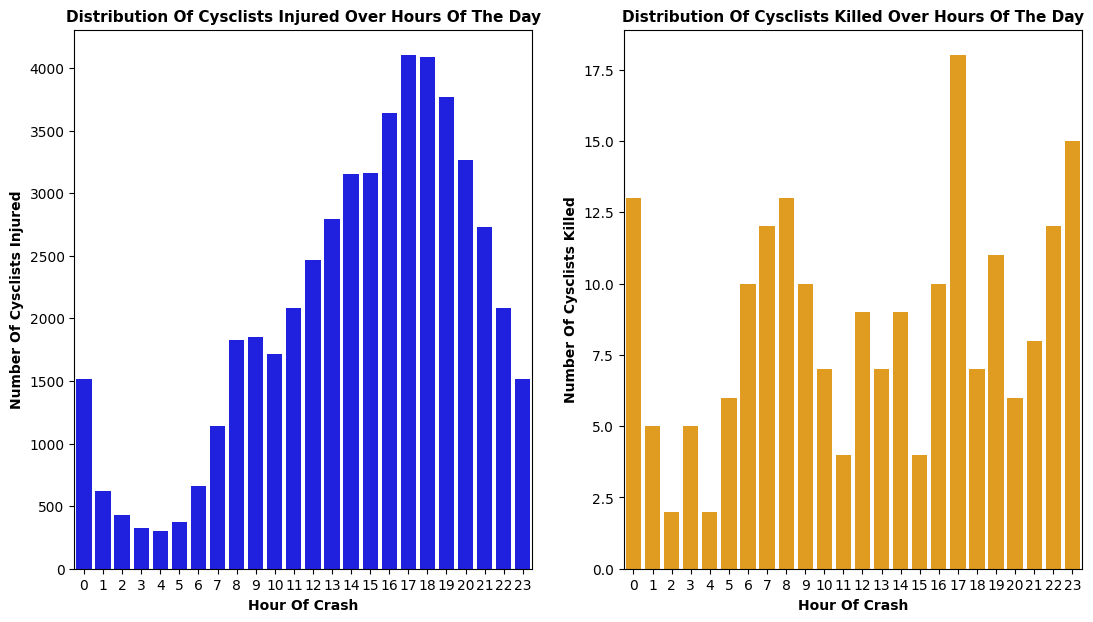

In [56]:
figure, axes=plt.subplots(1,2, figsize=(13,7))
sns.barplot(data=hourly_casualties, x="CRASH HOUR", y="NUMBER OF CYCLIST INJURED", ax=axes[0], palette=palette_x)
axes[0].set_xlabel("Hour Of Crash", fontweight="bold")
axes[0].set_ylabel("Number Of Cysclists Injured", fontweight="bold")
axes[0].set_title("Distribution Of Cysclists Injured Over Hours Of The Day", fontweight="bold", fontsize=11)

sns.barplot(data=hourly_casualties, x="CRASH HOUR", y="NUMBER OF CYCLIST KILLED", ax=axes[1], palette=palette_y)
axes[1].set_xlabel("Hour Of Crash", fontweight="bold")
axes[1].set_ylabel("Number Of Cysclists Killed", fontweight="bold")
axes[1].set_title("Distribution Of Cysclists Killed Over Hours Of The Day", fontweight="bold", fontsize=11)

plt.show()

### Motorists Injured and Motorists Killed

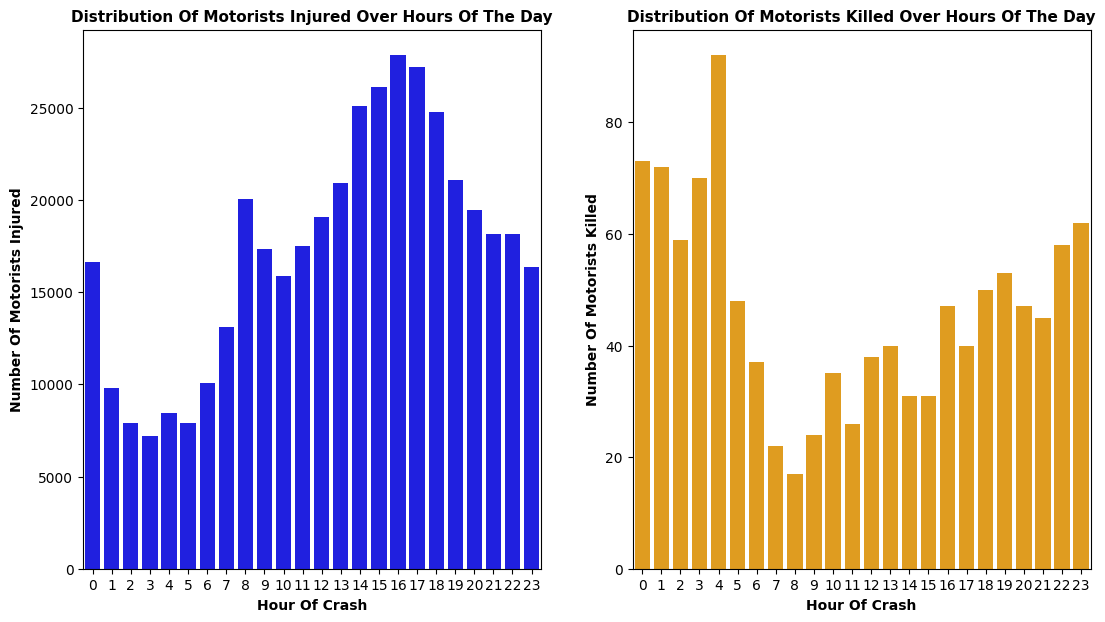

In [57]:
figure, axes=plt.subplots(1,2, figsize=(13,7))
sns.barplot(data=hourly_casualties, x="CRASH HOUR", y="NUMBER OF MOTORIST INJURED", ax=axes[0], palette=palette_x)
axes[0].set_xlabel("Hour Of Crash", fontweight="bold")
axes[0].set_ylabel("Number Of Motorists Injured", fontweight="bold")
axes[0].set_title("Distribution Of Motorists Injured Over Hours Of The Day", fontweight="bold", fontsize=11)

sns.barplot(data=hourly_casualties, x="CRASH HOUR", y="NUMBER OF MOTORIST KILLED", ax=axes[1], palette=palette_y)
axes[1].set_xlabel("Hour Of Crash", fontweight="bold")
axes[1].set_ylabel("Number Of Motorists Killed", fontweight="bold")
axes[1].set_title("Distribution Of Motorists Killed Over Hours Of The Day", fontweight="bold", fontsize=11)

plt.show()


## Casualities During Months Of The Year

In [58]:
year_month = col_12to22.groupby(["CRASH MONTH NAME"])[["NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().reset_index()

In [59]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [60]:
year_month["CRASH MONTH NAME"] = year_month["CRASH MONTH NAME"].astype(pd.CategoricalDtype(categories=month_order, ordered=True))
year_month

,CRASH MONTH NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,Apr,41029.0,185.0
1,Aug,55162.0,273.0
2,Dec,49622.0,247.0
3,Feb,35120.0,170.0
4,Jan,38942.0,195.0
5,Jul,55504.0,277.0
6,Jun,51249.0,241.0
7,Mar,41125.0,160.0
8,May,49110.0,213.0
9,Nov,49885.0,267.0


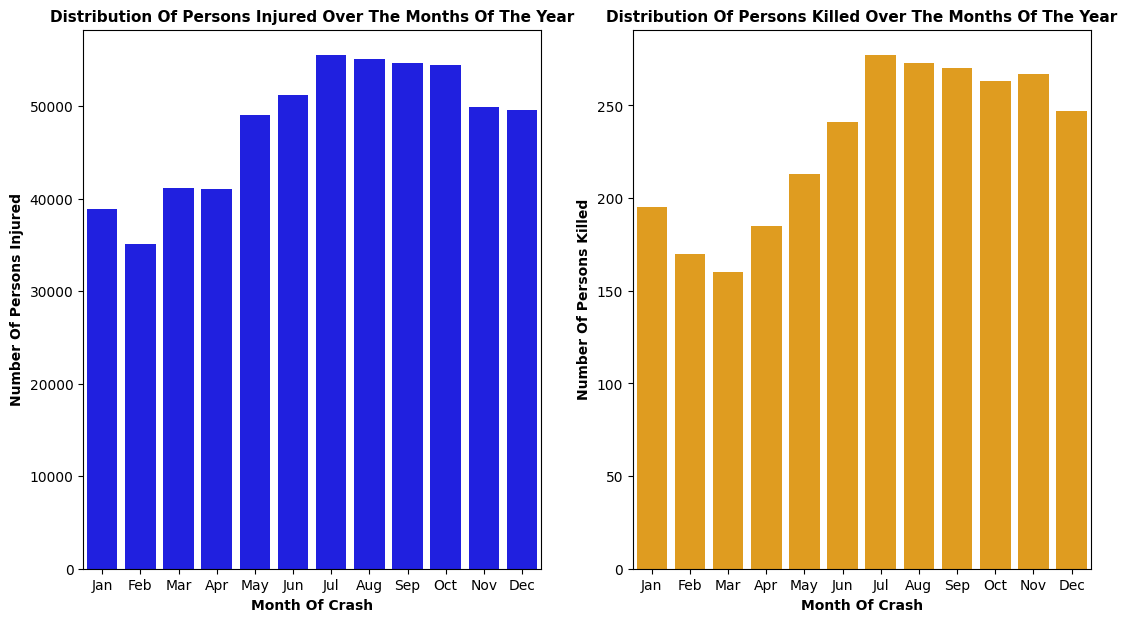

In [61]:
figure, axes=plt.subplots(1,2, figsize=(13,7))
            
sns.barplot(data=year_month, x="CRASH MONTH NAME", y="NUMBER OF PERSONS INJURED",ax=axes[0], palette=palette_x)
axes[0].set_xlabel("Month Of Crash", fontweight="bold")
axes[0].set_ylabel("Number Of Persons Injured", fontweight="bold")
axes[0].set_title("Distribution Of Persons Injured Over The Months Of The Year", fontweight="bold", fontsize=11)

sns.barplot(data=year_month, x="CRASH MONTH NAME", y="NUMBER OF PERSONS KILLED", ax=axes[1], palette=palette_y)
axes[1].set_xlabel("Month Of Crash", fontweight="bold")
axes[1].set_ylabel("Number Of Persons Killed", fontweight="bold")
axes[1].set_title("Distribution Of Persons Killed Over The Months Of The Year", fontweight="bold", fontsize=11)

plt.show()